# Using Neural Networks to predict customer conversion rate. 

Predicting whether a customer will be making a purchase based on two features:

- Website visit duration
- Number of pages visited

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Generating Synthetic Data

np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2) # Two features: visit duration, and pages visited. 
labels = (features[:, 0] + features[:, 1] > 1).astype('int') # Purchase (1) or not (0).

df = pd.DataFrame(features, columns = ['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

In [4]:
# Preprocessing the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[['VisitDuration', 'PagesVisited']], 
    df['Purchase'], 
    test_size = 0.2, 
    random_state = 42
)

In [5]:
# Building and training the neural network

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-06-22 02:00:18.828575: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-22 02:00:19.006924: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-22 02:00:19.112889: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750557619.243910   13059 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750557619.278570   13059 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750557619.555118   13059 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [7]:
# DEfining the model
model = Sequential([
    Dense(10, activation = 'relu', input_shape = (2, )), # Input layer with 2 features. 
    Dense(1, activation = 'sigmoid') # Outer layer with sigmoid activation for binary classification. 
])

# Compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10


2025-06-22 02:06:00.016329: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4356 - loss: 0.6857  
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6359 - loss: 0.6826 
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6566 - loss: 0.6827 
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6602 - loss: 0.6797 
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7200 - loss: 0.6753 
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7660 - loss: 0.6738 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8283 - loss: 0.6657 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928 - loss: 0.6646 
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7711 - loss: 0.6610 
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8358 - loss: 0.6552 


Model's Loss: Measures how far the model's predictions are from the actual class labels. It is a measure of the model's error. 

- **Binary Cross Entropy**: is commonly used in Binary Classification tasks. It calculates the loss of each instance by comparing the predicted probability with the actual label (0 or 1), and then takes the average across all instances. 

- **Interpretation**: lower loss values are better, indicating that the model's predictions are closer to the actual labels. A high loss value means that the model's predictions are far from the actual labels.

Model's Accuracy: Represents the fraction of predictions the model got right. In this context, it is the proportion of correctly predicted purchase decisions (both purchases and non-purchases) out of all predictions made. 

- **Formula**: Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)

- **Interpretation**: A higher accuracy usually means that the model correctly predicted a higher proportion of the total predictions made, usually indicating a better performing model. 

In [8]:
# Evaluating the model

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8313 - loss: 0.6531 
Test Accuracy: 0.824999988079071


## Visualizing the training process

Epoch 1/10


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8282 - loss: 0.6161 - val_accuracy: 0.8750 - val_loss: 0.5970
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8394 - loss: 0.6138 - val_accuracy: 0.8750 - val_loss: 0.5916
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8318 - loss: 0.6160 - val_accuracy: 0.8750 - val_loss: 0.5862
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8077 - loss: 0.6148 - val_accuracy: 0.9062 - val_loss: 0.5808
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8569 - loss: 0.6024 - val_accuracy: 0.9062 - val_loss: 0.5751
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8391 - loss: 0.5983 - val_accuracy: 0.9062 - val_loss: 0.5694
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8544 - loss: 0.5936 - val_accuracy: 0.9062 - val_loss: 0.5637
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8593 - loss: 0.5767 - val_accuracy: 0.9062 - val_loss: 0.5576
Epo

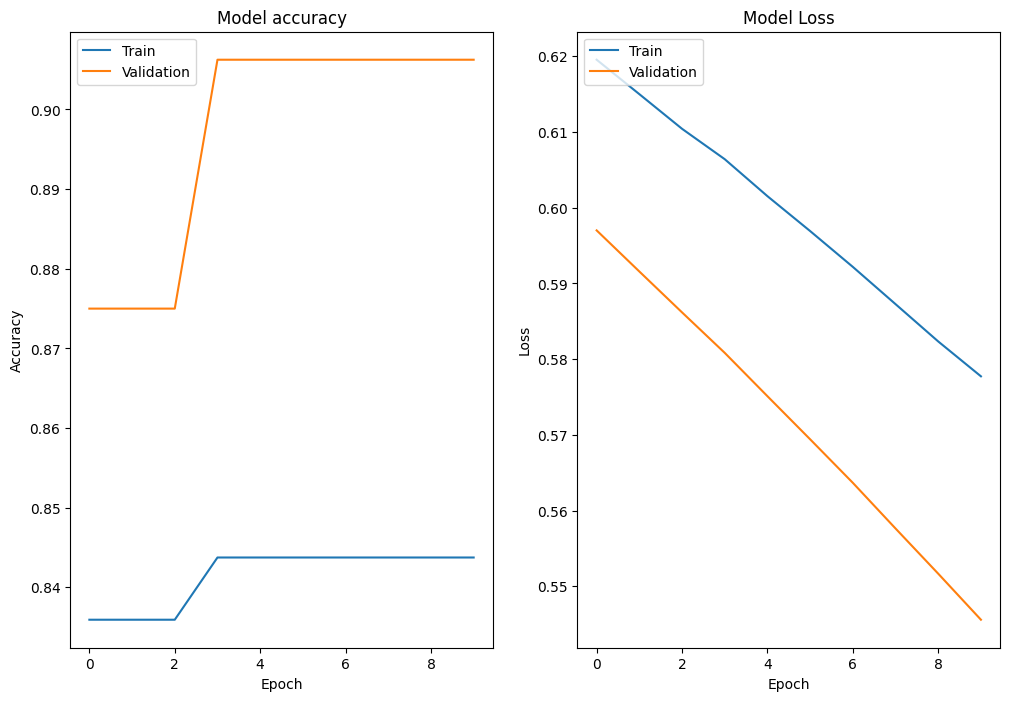

In [10]:
## Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## training model and saving history. 
history = model.fit(X_train, y_train, epochs = 10, batch_size = 10, validation_split = 0.2)

# Importing appropriate libraru for plotting
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))

# Plotting training and validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Decision Boundaries

The decision boundary is a concept used to visualize how the neural network categorizes or classifies the data. It is a boudary in the feature space that separated the data points into different classes based on the predictions made by the model. In this context, we have two features: VisitDuration and PagesVisited. The decision boundary will be a line or a curve in this 2-D space that separates the points predicted to make a purchase (class 1) from those predicted to not make a purchase (class 0). 

- **How it's determined**: The neural network learns the decision boundary during training. It adjusts its internal parameteres (weights and biases) to correctly classify the training data. The boundary is where the model's output (before applying a threshold) is at some critical value, often 0.5 for binary classification with a sigmoid output. Points on one side of the boundary are classified as one class, and points on the other side as the other class.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step


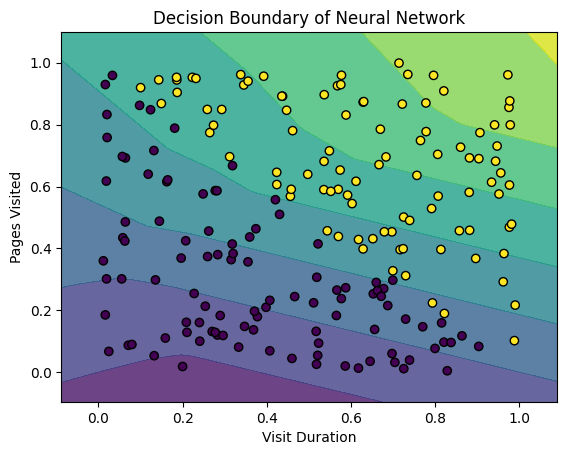

In [11]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()